<a href="https://colab.research.google.com/github/Abheek1/Stock-Prediction/blob/main/Stock_prediction_abheek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
import yfinance as yf

In [ ]:
start = '2014-01-01'
end = '2024-10-31'

df = yf.download('TATAMOTORS.NS', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2014-01-01 00:00:00+00:00,366.963196,370.970978,374.780121,370.080505,373.543365,1364747
2014-01-02 00:00:00+00:00,364.418549,368.398560,372.207703,365.281982,370.970978,3015089
2014-01-03 00:00:00+00:00,354.974091,358.850952,364.094727,356.179626,364.094727,5004049
2014-01-06 00:00:00+00:00,359.133575,363.055847,366.568176,360.335052,363.600037,5490077
2014-01-07 00:00:00+00:00,357.322968,361.225494,366.073486,359.889832,363.105347,4020899


In [ ]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2024-10-24 00:00:00+00:00,880.000000,880.000000,890.000000,875.250000,875.250000,7233484
2024-10-25 00:00:00+00:00,864.299988,864.299988,885.750000,857.299988,883.900024,10873022
2024-10-28 00:00:00+00:00,878.450012,878.450012,886.750000,860.200012,867.849976,7106045
2024-10-29 00:00:00+00:00,842.750000,842.750000,882.500000,825.700012,880.250000,26818871
2024-10-30 00:00:00+00:00,840.200012,840.200012,853.599976,838.049988,846.000000,12933218


In [ ]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2014-01-01 00:00:00+00:00,366.963196,370.970978,374.780121,370.080505,373.543365,1364747
1,2014-01-02 00:00:00+00:00,364.418549,368.398560,372.207703,365.281982,370.970978,3015089
2,2014-01-03 00:00:00+00:00,354.974091,358.850952,364.094727,356.179626,364.094727,5004049
3,2014-01-06 00:00:00+00:00,359.133575,363.055847,366.568176,360.335052,363.600037,5490077
4,2014-01-07 00:00:00+00:00,357.322968,361.225494,366.073486,359.889832,363.105347,4020899


In [ ]:
print(df.columns)

if 'Date' not in df.columns:
    df = df.reset_index()

columns_to_drop = ['Date', 'Adj Close']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

df.head()


MultiIndex([(     'Date',              ''),
            ('Adj Close', 'TATAMOTORS.NS'),
            (    'Close', 'TATAMOTORS.NS'),
            (     'High', 'TATAMOTORS.NS'),
            (      'Low', 'TATAMOTORS.NS'),
            (     'Open', 'TATAMOTORS.NS'),
            (   'Volume', 'TATAMOTORS.NS')],
           names=['Price', 'Ticker'])


<ipython-input-45-18a82aba0f96>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,370.970978,374.780121,370.080505,373.543365,1364747
1,368.398560,372.207703,365.281982,370.970978,3015089
2,358.850952,364.094727,356.179626,364.094727,5004049
3,363.055847,366.568176,360.335052,363.600037,5490077
4,361.225494,366.073486,359.889832,363.105347,4020899


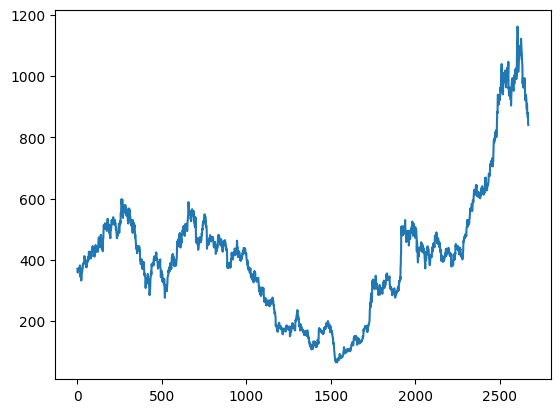

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,TATAMOTORS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2665,1004.019500
2666,1003.157999
2667,1002.903499
2668,1002.031499


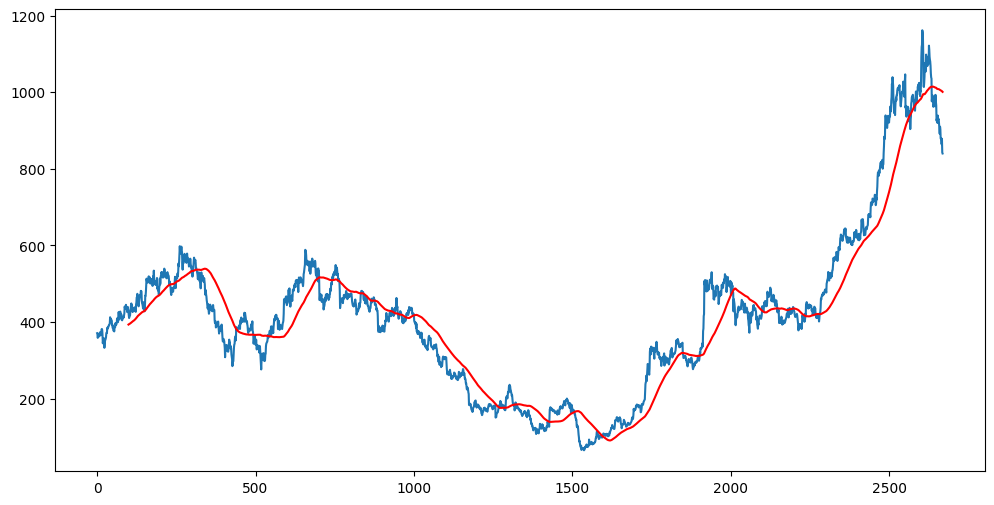

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,TATAMOTORS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2665,971.207751
2666,971.607250
2667,972.092250
2668,972.327250


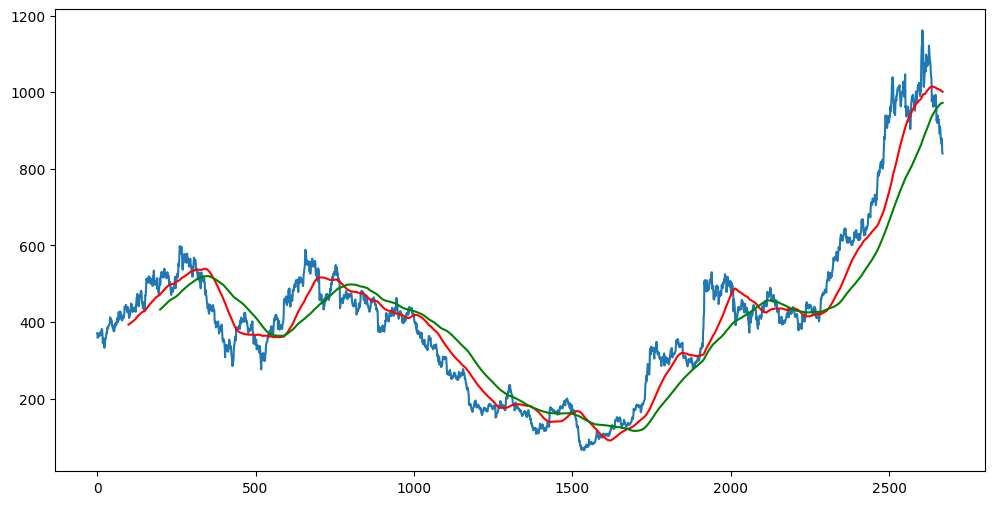

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2670, 5)

In [ ]:
#Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1868, 1)
(802, 1)


In [ ]:
data_training.head()

Ticker,TATAMOTORS.NS
0,370.970978
1,368.398560
2,358.850952
3,363.055847
4,361.225494


In [ ]:
data_testing.head()

Ticker,TATAMOTORS.NS
1868,303.700012
1869,298.149994
1870,299.700012
1871,300.049988
1872,298.100006


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.57366975],
       [0.56884195],
       [0.55092342],
       ...,
       [0.42714958],
       [0.42912021],
       [0.43456279]])

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#ML Model

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 355ms/step - loss: 0.0323
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - loss: 0.0068
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - loss: 0.0038
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - loss: 0.0038
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - loss: 0.0037
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - loss: 0.0031
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 283ms/step - loss: 0.0029
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0029
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 279ms/step - loss: 0.0033
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0027
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 278ms/step - loss: 0.0026
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 278ms/step - loss: 0.0021
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0034
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - loss: 0.0023
Epoch 15/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

Ticker,ADANIPOWER.NS
1868,91.849998
1869,90.250000
1870,88.150002
1871,92.550003
1872,90.349998


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,ADANIPOWER.NS
0,74.349998
1,78.050003
2,81.849998
3,77.800003
4,75.550003


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[9.36446496e-04],
       [5.55625492e-03],
       [1.03009115e-02],
       [5.24410609e-03],
       [2.43476660e-03],
       [7.11699908e-03],
       [1.18616556e-02],
       [1.69808946e-02],
       [1.95405188e-02],
       [2.32238712e-02],
       [2.89674173e-02],
       [3.49606692e-02],
       [3.83943063e-02],
       [3.19016144e-02],
       [2.57210618e-02],
       [1.98526676e-02],
       [1.42964222e-02],
       [1.96029524e-02],
       [2.51591978e-02],
       [3.09651679e-02],
       [3.29004850e-02],
       [2.97165726e-02],
       [3.00287214e-02],
       [2.39730360e-02],
       [2.12261206e-02],
       [2.14134118e-02],
       [2.26620071e-02],
       [1.72930434e-02],
       [1.69184705e-02],
       [1.69808946e-02],
       [1.77300594e-02],
       [1.76676258e-02],
       [2.04769653e-02],
       [2.60956443e-02],
       [2.92171326e-02],
       [2.64077931e-02],
       [2.74066732e-02],
       [2.75939548e-02],
       [2.92795662e-02],
       [2.90298414e-02],


In [ ]:
input_data.shape

(902, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(802, 100, 1)
(802,)


In [ ]:
#Making Predictions

y_predicted=model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step


In [ ]:
y_predicted.shape

(802, 1)

In [ ]:
y_test

array([0.02278686, 0.02078911, 0.01816707, 0.02366089, 0.02091397,
       0.01529529, 0.01223624, 0.01423399, 0.01417156, 0.01179923,
       0.00792858, 0.00461981, 0.00480709, 0.        , 0.00455737,
       0.00936446, 0.01442128, 0.01972781, 0.02528406, 0.03109003,
       0.03720814, 0.04363841, 0.036896  , 0.03046573, 0.02434761,
       0.03015358, 0.03614684, 0.03364965, 0.03196404, 0.03233862,
       0.03115246, 0.03352478, 0.02728181, 0.02615808, 0.02784368,
       0.02927957, 0.02778125, 0.02921713, 0.02796854, 0.03084031,
       0.02934199, 0.0291547 , 0.03514796, 0.04107879, 0.03489825,
       0.03539768, 0.03496067, 0.03527282, 0.0350231 , 0.0413285 ,
       0.04794606, 0.06193033, 0.06399051, 0.05905856, 0.06193033,
       0.05425147, 0.04694718, 0.04819578, 0.04388813, 0.03727057,
       0.03358722, 0.03652141, 0.03808216, 0.03702085, 0.03970534,
       0.0385816 , 0.04507429, 0.04563616, 0.04307654, 0.04351355,
       0.04189038, 0.04139094, 0.03833188, 0.03658385, 0.03414

In [ ]:
scaler.scale_
a=scaler.scale_
a

array([0.0012486])

In [ ]:
scale_factor=1/a
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

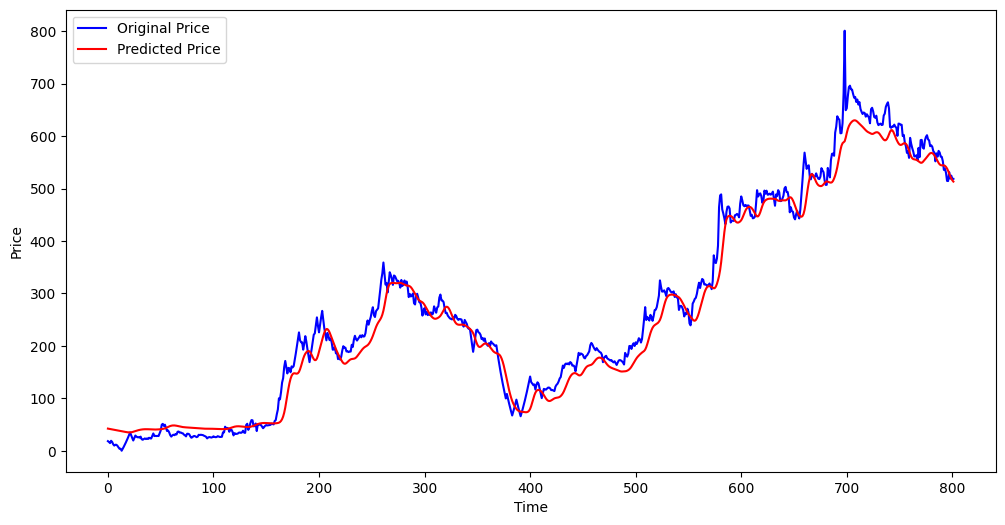

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()